In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
%matplotlib inline

In [116]:
data = pd.read_csv('train_fresh.xls')

In [117]:
data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [118]:
data.drop(['Product_Supermarket_Identifier','Product_Identifier','Supermarket_Identifier'], axis =1, inplace = True)

In [119]:
data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [120]:
train_test_split = [data]
supermarket_size = {'High': 2,'Medium': 1,'Small':0}
for dataset in train_test_split:
    dataset['Supermarket _Size'] =dataset['Supermarket _Size'].map(supermarket_size)

In [121]:
data['Product_Weight'].fillna(data.groupby('Product_Fat_Content')['Product_Weight'].transform('mean'), inplace = True)

In [122]:
data.isnull().sum()

Product_Weight                  0
Product_Fat_Content             0
Product_Shelf_Visibility        0
Product_Type                    0
Product_Price                   0
Supermarket_Opening_Year        0
Supermarket _Size            1450
Supermarket_Location_Type       0
Supermarket_Type                0
Product_Supermarket_Sales       0
dtype: int64

In [123]:
data['Supermarket _Size'].fillna(data.groupby('Product_Type')['Supermarket _Size'].transform('median'), inplace = True)

In [124]:
data.isnull().sum()

Product_Weight               0
Product_Fat_Content          0
Product_Shelf_Visibility     0
Product_Type                 0
Product_Price                0
Supermarket_Opening_Year     0
Supermarket _Size            0
Supermarket_Location_Type    0
Supermarket_Type             0
Product_Supermarket_Sales    0
dtype: int64

In [125]:
data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,1.0,Cluster 3,Grocery Store,709.08
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,2.0,Cluster 3,Supermarket Type1,6381.69
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,1.0,Cluster 2,Supermarket Type1,6381.69
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,1.0,Cluster 3,Supermarket Type2,2127.23
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,0.0,Cluster 2,Supermarket Type1,2481.77


In [126]:
dum1 = pd.get_dummies(data['Product_Fat_Content'])
dum2 = pd.get_dummies(data['Supermarket_Location_Type'])
dum3 = pd.get_dummies(data['Supermarket_Type'])
dum4 = pd.get_dummies(data['Product_Type'])

In [127]:
data = pd.concat([data,dum1,dum2,dum3,dum4],axis = 1)

In [128]:
data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,1.0,Cluster 3,Grocery Store,709.08,...,0,0,0,0,0,0,0,0,1,0
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,2.0,Cluster 3,Supermarket Type1,6381.69,...,0,0,0,0,0,0,0,0,1,0
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,1.0,Cluster 2,Supermarket Type1,6381.69,...,0,0,0,0,0,0,0,0,1,0
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,1.0,Cluster 3,Supermarket Type2,2127.23,...,0,0,0,0,0,0,0,0,1,0
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,0.0,Cluster 2,Supermarket Type1,2481.77,...,0,0,0,0,0,0,0,0,1,0


In [129]:
data.drop(['Product_Fat_Content','Product_Type','Supermarket_Location_Type','Supermarket_Type'], axis =1 , inplace = True)

In [156]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,11.6,0.068535,357.54,2005,1.0,709.08,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,11.6,0.040912,355.79,1994,2.0,6381.69,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11.6,0.041178,350.79,2014,1.0,6381.69,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,11.6,0.041113,355.04,2016,1.0,2127.23,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11.6,0.000000,354.79,2011,0.0,2481.77,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [157]:
tes.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,8.270,0.214125,459.98,2005,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,8.270,0.127821,464.98,1994,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7.390,0.082171,477.38,1994,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6.115,0.011791,472.63,2005,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.115,0.007038,473.13,1994,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [158]:
X = data.drop('Product_Supermarket_Sales',axis =1)

In [159]:
y = data['Product_Supermarket_Sales']

In [160]:
from sklearn.cross_validation import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
model = LinearRegression()

In [164]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
predict = model.predict(X_test)

In [166]:
from sklearn.cross_validation import cross_val_score

In [167]:
scores = cross_val_score(model,X_test,y_test,cv =10)

In [168]:
print(scores.mean()*100)

57.246039005537796


In [169]:
from xgboost import XGBRegressor

In [170]:
kinoo = XGBRegressor()

In [171]:
kinoo.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [172]:
samoo = kinoo.predict(X_test)

In [174]:
from sklearn.cross_validation import cross_val_score
yy = cross_val_score(kinoo,X_test,y_test,cv =10)

In [176]:
print(yy.mean()*100)

57.72250038389713


In [177]:
mypred = kinoo.predict(tes)

In [178]:
dat11  =pd.read_csv('submission_price.xls')
dat11.drop('Product_Supermarket_Sales',axis = 1 , inplace = True)

In [179]:
a = pd.DataFrame({'Product_Supermarket_Sales':mypred})

In [180]:
submitted1 = pd.concat([dat11,a],axis =1)

In [181]:
submitted1.to_csv('answe9.csv',index = False)

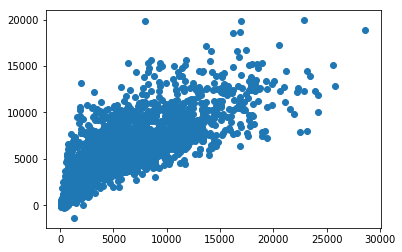

In [182]:
plt.scatter(y_test,samoo)

In [183]:
from sklearn.grid_search import GridSearchCV

In [184]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [185]:
grid = GridSearchCV( XGBRegressor() , params, verbose =  3  )

In [186]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.526696 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.501179 -   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.487181 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.528565 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.512457 -   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.494607 -   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.532109 -   0.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.519702 -   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.509325 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.497778 -   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.473910 -   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.519810 -   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.501335 -   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV] 

[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.532109 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.519702 -   0.0s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.498014 -   0.0s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.531209 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.504254 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1

[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.501335 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.476899 -   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.520102 -   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.500463 -   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.475846 -   0.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.483089 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.525434 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.500571 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.493160 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.531042 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.492592 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.471890 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.451011 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.493224 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.474986 -   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample

[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.531042 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.513752 -   0.0s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.497969 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.526755 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.505410 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, ga

[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.474986 -   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.478828 -   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.514757 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.490487 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.475706 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2

[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.532826 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.506656 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.490993 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.532157 -   0.0s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.513099 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.

[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.473292 -   0.2s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.455095 -   0.2s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.511069 -   0.2s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.466864 -   0.2s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.464977 -   0.2s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.506595 -   0.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.491847 -   0.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.510908 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.488830 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.455145 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsam

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.457881 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.453280 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.514232 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.470110 -   0.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.469199 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsampl

[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6, score=0.488830 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6, score=0.455145 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.510190 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.497077 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.485569 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1

[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=0.469199 -   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.502669 -   0.4s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.481450 -   0.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.462292 -   0.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, score=0.500762 -   0.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.485569 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.522636 -   0.1s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.490466 -   0.1s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.474313 -   0.1s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=0.511178 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=0.462292 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.500762 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.475902 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.464700 -   0.3s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0, score=0.502426 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV] 

[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6, score=0.511178 -   0.2s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6, score=0.497702 -   0.4s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6, score=0.469594 -   0.3s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=0.501619 -   0.3s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=0.485959 -   0.7s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2

[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=0.478008 -   0.4s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=0.478391 -   0.3s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.531972 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.501304 -   0.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.489058 -   0.3s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamm

[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.479229 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.524050 -   0.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.482457 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.485816 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.516348 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamm

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.527737 -   0.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.507590 -   0.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.490409 -   0.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.534017 -   0.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.509822 -   0.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.506890 -   0.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.486633 -   0.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.466531 -   0.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.505491 -   0.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.492334 -   0.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV] 

[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.534017 -   0.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.509822 -   0.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.491034 -   0.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.515520 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.498744 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1

[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.492334 -   0.3s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.478878 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.520414 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.490695 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.483823 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.483065 -   0.2s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.524641 -   0.2s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.499155 -   0.2s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.479972 -   0.2s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.536389 -   0.1s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.483823 -   0.2s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.466347 -   0.4s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.452603 -   0.4s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.441220 -   0.4s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.475861 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsampl

[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.8, score=0.479972 -   0.2s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.536389 -   0.1s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.500379 -   0.1s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.496724 -   0.1s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.524377 -   0.2s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamm

[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.475861 -   0.3s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.467525 -   0.3s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.469958 -   0.3s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.493509 -   0.3s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.469165 -   0.3s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2

[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.499893 -   0.3s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.484256 -   0.3s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.525301 -   0.2s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.499402 -   0.2s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.488789 -   0.2s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.

[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.447289 -   0.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.480624 -   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.467550 -   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.454584 -   0.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.491280 -   0.3s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5

[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  6.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [187]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1.0)

In [188]:
gri = grid.predict(X_test)

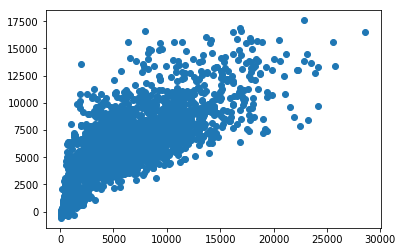

In [189]:
plt.scatter(y_test,gri)

In [190]:
myee = grid.predict(tes)

In [191]:
dat11  =pd.read_csv('submission_price.xls')
dat11.drop('Product_Supermarket_Sales',axis = 1 , inplace = True)

In [192]:
a = pd.DataFrame({'Product_Supermarket_Sales':myee})

In [193]:
submitted1 = pd.concat([dat11,a],axis =1)

In [194]:
submitted1.to_csv('ans1.csv',index = False)

In [ ]:
from sklearn.cross_validation import cross_val_score
sss = cross_val_score(grid,X_test,y_test,cv =10)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.583550 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.554885 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.623880 -   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.583324 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.555579 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.619323 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.584641 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.617023 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.581884 -   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.555210 -   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.618864 -   0.4s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.590416 -   0.6s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  

[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.584641 -   0.0s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.558451 -   0.0s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.623139 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.586367 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.561309 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1

[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.550586 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.626926 -   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.589083 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.554171 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.620782 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.622128 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.585577 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.557655 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.620322 -   0.0s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.583607 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.620782 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.565569 -   0.6s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.526994 -   0.4s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.608967 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.566432 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsampl

[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=0.8, score=0.620322 -   0.3s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.583607 -   0.0s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.561848 -   0.0s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.623232 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.588222 -   0.3s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamm

[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.566432 -   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.534085 -   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.612412 -   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.577885 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.535329 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2

[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.625409 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.589904 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.557136 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.628700 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.588266 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.

[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.571861 -   0.2s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.547867 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.619077 -   0.2s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.572773 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.542397 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.558257 -   0.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.628557 -   0.0s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.574304 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.555828 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.610843 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsam

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.542373 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.605709 -   0.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.583939 -   0.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.547698 -   0.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.602071 -   0.5s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsampl

[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6, score=0.555828 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6, score=0.610843 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.582088 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.546078 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.608883 -   0.4s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1

[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=0.602071 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.581870 -   0.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.542396 -   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.611207 -   0.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8, score=0.582546 -   0.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.608883 -   0.6s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.586146 -   0.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.544177 -   0.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.611781 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6, score=0.589729 -   0.3s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=0.611207 -   0.3s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.582546 -   0.3s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.543529 -   0.3s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.611642 -   0.3s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0, score=0.589762 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV] 

[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6, score=0.589729 -   0.2s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6, score=0.547395 -   0.2s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6, score=0.618028 -   0.2s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=0.570497 -   0.2s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=0.546585 -   0.2s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2

[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=0.539023 -   0.2s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=0.615272 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.590959 -   0.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.557923 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.621999 -   0.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamm

[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.610763 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.589702 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.554325 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.612414 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.585685 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamm

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.585369 -   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.554070 -   0.4s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.613345 -   0.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.581874 -   0.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.554113 -   0.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.592445 -   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.544093 -   0.6s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.616197 -   0.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.580701 -   0.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.548532 -   0.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV] 

[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.581874 -   0.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.554113 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.611831 -   0.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.596145 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.547686 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1

[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.548532 -   0.3s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.620372 -   0.3s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.586125 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.555613 -   0.3s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.616035 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.623690 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.590010 -   0.2s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.554042 -   0.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.619019 -   0.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.589450 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.616035 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.553542 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.527703 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.599050 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.556315 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsampl

[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.8, score=0.619019 -   0.3s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.589450 -   0.3s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.555485 -   0.3s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.619644 -   0.2s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.595995 -   0.2s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamm

[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.556315 -   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.520972 -   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.591829 -   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.560391 -   0.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.521582 -   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2

[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.557563 -   0.2s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.623732 -   0.2s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.593279 -   0.2s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.558993 -   0.2s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.627312 -   0.2s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.

[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.605105 -   0.3s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.569031 -   0.4s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.531002 -   0.4s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.605732 -   0.4s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.564253 -   0.3s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5

[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  7.3min finished


Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.570513 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.558419 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.613433 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.571164 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.549456 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.616645 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.564264 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.604612 -   0.4s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.569188 -   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.550113 -   0.5s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.609269 -   0.4s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.570265 -   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  

[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.616645 -   0.4s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.564264 -   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.552616 -   0.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.617898 -   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.571718 -   0.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1

[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.570265 -   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.544857 -   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.612760 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.564912 -   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.551226 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.614038 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.567275 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.555166 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.615134 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.566230 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.613669 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.551730 -   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.527328 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.593479 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.542761 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsampl

[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=0.8, score=0.615134 -   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.566230 -   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.552351 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.613611 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.577272 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamm

[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.542761 -   0.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.528621 -   0.7s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.599851 -   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.553987 -   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.532219 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2

[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.611949 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.568779 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.551776 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.618397 -   0.0s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.570870 -   0.0s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.

[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.556434 -   0.2s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.530088 -   0.2s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.597006 -   0.2s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.552147 -   0.2s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.538200 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.575218 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.553897 -   0.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.614769 -   0.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.561583 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.546042 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  cols

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.540563 -   0.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.540352 -   0.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.586395 -   0.5s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.551781 -   0.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.524399 -   0.5s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6, score=0.561583 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6, score=0.546042 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6, score=0.605749 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.567377 -   0.1s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.550536 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1

[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=0.524399 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=0.585089 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.571406 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.537645 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.595209 -   0.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.550536 -   0.1s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.606447 -   0.1s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.560244 -   0.1s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.533352 -   0.1s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.607310 -   0.1s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=0.537645 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=0.595209 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.564275 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.536643 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.595867 -   0.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV] 

[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6, score=0.574989 -   0.2s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6, score=0.542926 -   0.2s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6, score=0.612587 -   0.2s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=0.552142 -   0.1s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8, score=0.545568 -   0.1s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2

[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=0.528419 -   0.2s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=0.600736 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.571175 -   0.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.554018 -   0.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.608639 -   0.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamm

[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.603373 -   0.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.560974 -   0.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.536472 -   0.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.603825 -   0.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.575790 -   0.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamm

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.570673 -   0.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.552740 -   0.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.609218 -   0.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.564936 -   0.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.545155 -   0.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.573708 -   0.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.543611 -   0.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.606654 -   0.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.566858 -   0.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.548177 -   0.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV] 

[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.564936 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.545155 -   0.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.610418 -   0.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.580246 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.550866 -   0.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1

[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.548177 -   0.3s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.604132 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.565546 -   0.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.544482 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.601446 -   0.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.612454 -   0.2s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.567535 -   0.2s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.551767 -   0.2s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.610778 -   0.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.566808 -   0.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.601446 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.535037 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.518452 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.590755 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.541859 -   0.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsampl

[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=0.8, score=0.610778 -   0.1s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.566808 -   0.1s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.544663 -   0.1s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.613173 -   0.1s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.582151 -   0.1s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamm

[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.541859 -   0.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.523725 -   0.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=0.8, score=0.591018 -   0.3s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.540699 -   0.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.527139 -   0.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2

[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.548723 -   0.2s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.610516 -   0.1s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.577954 -   0.1s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.557013 -   0.2s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.614268 -   0.3s
[CV] colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.

[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.593854 -   0.2s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.551324 -   0.3s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.519856 -   0.3s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.586895 -   0.3s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.546809 -   0.3s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5

[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  6.3min finished


Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.583620 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.552044 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.617178 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.584335 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.550139 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.617514 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.583888 -   0.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.548525 -   0.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample

[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.547457 -   0.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.607285 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.587997 -   0.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.552722 -   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.617737 -   0.2s
[CV] 

[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.548525 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.610763 -   0.0s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.587064 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.554593 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, score=0.607762 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1

[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.617737 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.589038 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.545151 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.610635 -   0.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, score=0.558424 -   0.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, 

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.556516 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.615434 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.585235 -   0.0s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.551491 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.612105 -   0.5s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsampl

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.528705 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.584749 -   0.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.562548 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.528584 -   0.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.606184 -   0.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample

[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=1.0, score=0.612105 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.589685 -   0.0s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.552680 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.609839 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8, score=0.587972 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6

[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.578356 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.526965 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.599553 -   0.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.569896 -   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.528234 -   0.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2

[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.556110 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.616633 -   0.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.591650 -   0.8s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.555938 -   0.5s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.612467 -   0.8s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6

In [ ]:
print(sss.mean()*100)

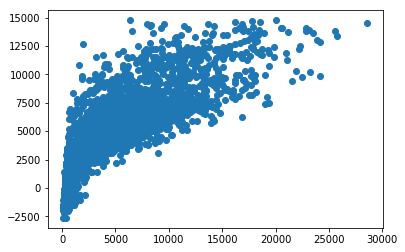

In [142]:
plt.scatter(y_test,predict)

In [143]:
from sklearn.preprocessing import PolynomialFeatures

In [144]:
poly_reg = PolynomialFeatures(degree = 2)

In [145]:
X_poly = poly_reg.fit_transform(X_train)

In [146]:
linear_reg = LinearRegression()

In [147]:
linear_reg.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [148]:
pred = linear_reg.predict(X_poly)

In [149]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(linear_reg,X_test,y_test,cv =10)

In [150]:
print(scores.mean()*100)

57.246039005537796


In [151]:
tes = pd.read_csv('te_fit.xls')

In [152]:
tes.drop(['Unnamed: 0','sss'], axis = 1,inplace = True)

In [153]:
data.head(2)

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,11.6,0.068535,357.54,2005,1.0,709.08,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,11.6,0.040912,355.79,1994,2.0,6381.69,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [154]:
tes.head(2)

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,8.27,0.214125,459.98,2005,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,8.27,0.127821,464.98,1994,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [155]:
kipre = linear_reg.predict(tes)

ValueError: shapes (3532,31) and (528,) not aligned: 31 (dim 1) != 528 (dim 0)

In [ ]:
pre = model.predict(tes)

In [ ]:
dat11  =pd.read_csv('submission_price.xls')
dat11.drop('Product_Supermarket_Sales',axis = 1 , inplace = True)
a = pd.DataFrame({'Product_Supermarket_Sales':pre})

In [ ]:
submitted1 = pd.concat([dat11,a],axis =1)

In [ ]:
submitted1.to_csv('submit2.csv',index = False)

In [ ]:
from sklearn.svm import SVR

In [ ]:
med = SVR()

In [ ]:
med.fit(X_train,y_train)

In [ ]:
predic = med.predict(X_test)

In [ ]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(med,X_test,y_test,cv =10)

In [ ]:
print(scores.mean()*100)

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression

In [ ]:
X_train, y_train = make_regression(n_features=4, random_state=0)

In [ ]:
regr = LinearSVR(random_state=0)

In [ ]:
regr.fit(X, y)

In [ ]:
ppp = regr.predict(X)

In [ ]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(regr,X,y,cv =10)

In [ ]:
print(score.mean()*100)

In [ ]:
pred4 = model.predict(tes)

In [ ]:
pred4

In [ ]:
dat11  =pd.read_csv('submission_price.xls')
dat11.drop('Product_Supermarket_Sales',axis = 1 , inplace = True)
a = pd.DataFrame({'Product_Supermarket_Sales':pred4})

In [ ]:
submitted1 = pd.concat([dat11,a],axis =1)

In [ ]:
submitted1.to_csv('submit3.csv',index = False)

In [ ]:
data.head()

In [ ]:
data['sss'] = data['Product_Supermarket_Sales'] - data['Product_Price']

In [ ]:
data.head()

In [ ]:
X = data.drop('Product_Supermarket_Sales',axis =1)

In [ ]:
y = data['Product_Supermarket_Sales']

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
moddd = LinearRegression()

In [ ]:
moddd.fit(X_train,y_train)

In [ ]:
pred1 = moddd.predict(X_test)

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
scores = cross_val_score(model,X_test,y_test,cv =10)

In [ ]:
print(scores.mean()*100)

In [ ]:
plt.scatter(y_test,pred1)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(y_test,pred1)

In [ ]:
test = pd.read_csv('te_fit.xls')

In [ ]:
test.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
test.head()

In [ ]:
subpre = moddd.predict(test)

In [ ]:
subpre

In [ ]:
dat11  =pd.read_csv('submission_price.xls')

In [ ]:
dat11.drop('Product_Supermarket_Sales',axis = 1 , inplace = True)

In [ ]:
a = pd.DataFrame({'Product_Supermarket_Sales':subpre})

In [ ]:
submitted1 = pd.concat([dat11,a],axis =1)

In [ ]:
submitted1.head()

In [ ]:
submitted1.to_csv('submit1.csv',index = False)